In [1]:
import pandas as pd
import sys
sys.path.append("../lib")
import seaborn as sns
import matplotlib.pyplot as plt
from utils import iterate_over
from utils import load_config_and_check
import os

In [2]:
config = load_config_and_check("../config/experiment_v11.yaml")

In [3]:
%load_ext autoreload
%autoreload 2

In [10]:
FOLDER_DETECTION = os.path.join(config["experiment_folder"], "cross_platform", "predictions")
all_detectors = os.listdir(FOLDER_DETECTION)
all_records = [] 

assert config["n_executions"] == 1
# we assume there is only one executions per program
# platform a vs b only once

for detector_name in all_detectors:
    path_detector = os.path.join(FOLDER_DETECTION, detector_name)
    
    for program_id, content in iterate_over(path_detector, filetype=".json", parse_json=True):
        comparison = content.pop("comparisons")
        new_content = {**content, **comparison[0]}
        all_records.append(new_content)
        
df = pd.DataFrame.from_records(all_records)

In [11]:
df.head()

,test,test_long_name,comparison_name,circuit_id,random_seed,platform_a,platform_b,path_exec_a,path_exec_b,time,statistic,p_value
0,fast_energy,Faster Energy Test,cross_platform,8,4321.0,cirq,qiskit,../data/experiment_v11/cross_platform/executio...,../data/experiment_v11/cross_platform/executio...,0.183410,0.608710,0.00001
1,fast_energy,Faster Energy Test,cross_platform,0,4321.0,cirq,qiskit,../data/experiment_v11/cross_platform/executio...,../data/experiment_v11/cross_platform/executio...,0.180246,0.115605,0.00001
2,fast_energy,Faster Energy Test,cross_platform,4,4321.0,cirq,qiskit,../data/experiment_v11/cross_platform/executio...,../data/experiment_v11/cross_platform/executio...,0.123734,0.096143,0.00001
3,fast_energy,Faster Energy Test,cross_platform,5,4321.0,cirq,qiskit,../data/experiment_v11/cross_platform/executio...,../data/experiment_v11/cross_platform/executio...,0.808558,0.061381,0.00001
4,fast_energy,Faster Energy Test,cross_platform,1,4321.0,cirq,qiskit,../data/experiment_v11/cross_platform/executio...,../data/experiment_v11/cross_platform/executio...,1.052885,0.221009,0.00001


In [18]:
df[["circuit_id", "test", "statistic"]].head(30)

,circuit_id,test,statistic
0,8,fast_energy,0.608710
1,0,fast_energy,0.115605
2,4,fast_energy,0.096143
3,5,fast_energy,0.061381
4,1,fast_energy,0.221009
5,7,fast_energy,0.356990
6,2,fast_energy,0.181518
7,3,fast_energy,0.001506
8,9,fast_energy,0.264325
9,6,fast_energy,0.565299


coefficient: 0.9999999999999999, p_value: 6.646897422032013e-64
coefficient: 0.9393939393939393, p_value: 5.484052998513666e-05


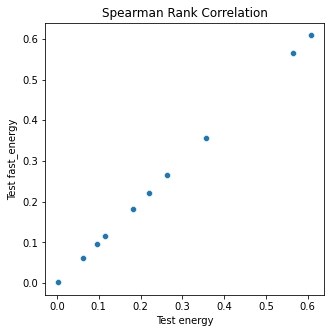

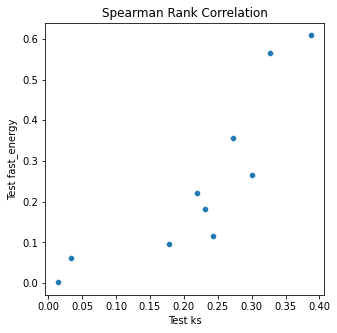

In [37]:
from scipy.stats import spearmanr


def compare_correlation(df, test_1, test_2):
    df = df[["circuit_id", "test", "statistic"]]
    df_1 = df[df["test"] == test_1]
    df_2 = df[df["test"] == test_2]
    df_join = pd.merge(
        df_1, df_2, on="circuit_id"
    )
    coefficient, p_value = spearmanr(df_join["statistic_x"], df_join["statistic_y"])
    print(f"coefficient: {coefficient}, p_value: {p_value}")
    fig, ax = plt.subplots(figsize=(5,5))
    sns.scatterplot(
        data=df_join,
        x='statistic_x',
        y='statistic_y',
        ax=ax
    )
    ax.set_xlabel(f"Test {test_1}")
    ax.set_ylabel(f"Test {test_2}")
    ax.set_title("Spearman Rank Correlation")
    
    

compare_correlation(df, test_1="energy", test_2="fast_energy")

compare_correlation(df, test_1="ks", test_2="fast_energy")

In [30]:
df_join.head()

,circuit_id,test_x,statistic_x,test_y,statistic_y
0,8,energy,0.608710,fast_energy,0.608710
1,0,energy,0.115605,fast_energy,0.115605
2,4,energy,0.096143,fast_energy,0.096143
3,5,energy,0.061381,fast_energy,0.061381
4,1,energy,0.221009,fast_energy,0.221009


NameError: name 'test_1' is not defined

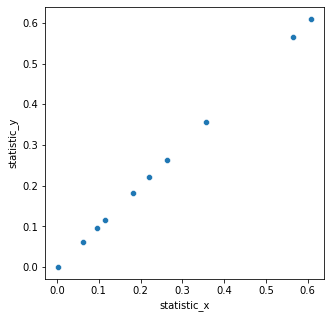

<AxesSubplot:xlabel='test', ylabel='time'>

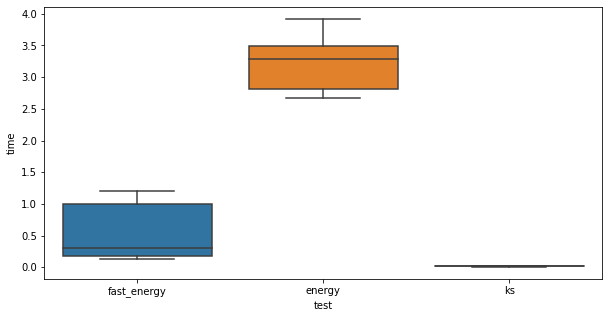

In [15]:
fig, ax = plt.subplots(figsize=(10,5))

sns.boxplot(
    data=df,
    y='time',
    x='test',
    ax=ax
)